# Natural languaje processing

## Packages

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Text

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-02-24 11:49:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-02-24 11:49:22 (164 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Index of words and y sentences as numbers

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_7 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 27s - loss: 0.4138 - accuracy: 0.7918 - val_loss: 0.3452 - val_accuracy: 0.8505
Epoch 2/10
625/625 - 23s - loss: 0.2215 - accuracy: 0.9101 - val_loss: 0.3609 - val_accuracy: 0.8542
Epoch 3/10
625/625 - 23s - loss: 0.1395 - accuracy: 0.9478 - val_loss: 0.4079 - val_accuracy: 0.8520
Epoch 4/10
625/625 - 24s - loss: 0.0863 - accuracy: 0.9709 - val_loss: 0.4929 - val_accuracy: 0.8427
Epoch 5/10
625/625 - 23s - loss: 0.0549 - accuracy: 0.9818 - val_loss: 0.6043 - val_accuracy: 0.8413
Epoch 6/10
625/625 - 24s - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.6917 - val_accuracy: 0.8395
Epoch 7/10
625/625 - 23s - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.7472 - val_accuracy: 0.8377
Epoch 8/10
625/625 - 23s - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.7627 - val_accuracy: 0.8360
Epoch 9/10
625/625 - 23s - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.9304 - val_accuracy: 0.8313
Epoch 10/10
625/625 - 23s - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.9983 - val_accura

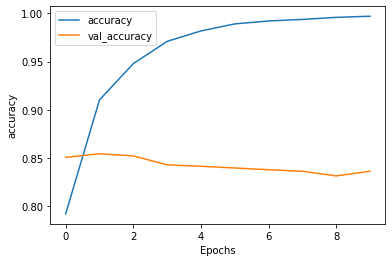

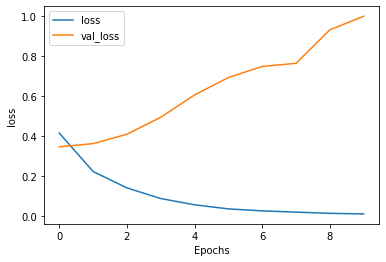

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Predictions

In [ ]:
num=7
sentence = [testing_sentences[num]]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('Prediction:',model.predict(padded)[0][0])
print('Valor real:',testing_labels[num])

Prediction: 0.9999713
Valor real: 1
